In [67]:
import numpy as np
import os
import PIL
import PIL.Image
import tensorflow as tf
import tensorflow_datasets as tfds
from glob import glob
from tensorflow.keras.preprocessing.text import text_to_word_sequence
import cv2
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from tensorflow.keras.layers import *
from tensorflow.keras.models import Sequential
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from sklearn.preprocessing import LabelEncoder
import tensorflow as tf
from tensorflow.keras.layers import *
from tensorflow.keras.models import *
import glob
import os
import sys
import urllib
from functools import partial
from tkinter import *
import tkinter.filedialog as tkfd
import requests
from PIL import Image, ImageTk

import pathlib

In [53]:
model=load_model('/Users/syshin/Desktop/Himedia/Himedia_project/image_classification/.h5')


In [2]:
result_dic

{}

In [3]:
if True:
    result_dic[1]=1

In [4]:
result_dic

{1: 1}

In [61]:
new_dir = os.chdir('/Users/syshin/Desktop/Himedia/Himedia_project/image_classification/archive (1)/test/3333')
img_in_folder = glob.glob('*.*')


In [42]:
channel_n=3 # 컬러 색상으로 설정

def make_file(data_height, data_width, channel_n, data_list_len, img_in_folder): # 높이, 너비, 컬러, 리스트 길이
    # 4차원으로 만들기 위한 4차원 리스트 필요
    print("make_file img_in_folder>>", img_in_folder)
    images=np.zeros((data_list_len, data_height, data_width, channel_n))
    # 이미지 리스트에서 하나씩 꺼내서 라벨링, 스케일링, 리사이징
    for i, image in enumerate(img_in_folder):     
        # 읽어서 스케일링, 리사이징 
        image=cv2.imread(image) /255 #읽기, 스케일링
        image=cv2.resize(image, (data_height, data_width)) #리사이징
        # 4차원 리스트에 하나씩 append
        images[i, :, :, :]=image
    return images

In [44]:
batch_size = 32
data_height = 160
data_width = 160

images = make_file(data_height, data_width, channel_n, len(img_in_folder), img_in_folder)
a = model.predict(images)
print(a)

make_file img_in_folder>> ['0fHeKYoMo0ros0awsLY7.jpg', '8.jpg', '0FKrjRLYgkajdG28i1nR.jpg', '14-02-07-Cath�drale_Notre-Dame_de_Strasbourg-RalfR-23.jpg', '0FnjE2Q25duHARU3m52d.jpeg', '0001.jpg', '0002.jpg', '3 18.59.20.jpg', '01dee7c857692cce250fcc7fba309f3f.jpg', '0B2AZVJVj7cXIkdsguqT.jpg', '9.jpeg', '7.jpg', '2.jpg', '3.jpg', '1.jpg', '3 18.59.45.jpg', '0.jpg']
1/1 [==============================] - 0s 14ms/step
[[ 2.5257368  -1.3063082  -1.5632157  -0.11098731]
 [ 2.5045037  -1.2835075  -1.5741197  -0.08543843]
 [ 2.5075557  -1.2851063  -1.574773   -0.08417538]
 [ 2.5387146  -1.3112282  -1.5787387  -0.10861585]
 [ 2.49645    -1.283279   -1.5610179  -0.09357667]
 [ 2.5099287  -1.2991184  -1.5669682  -0.09601358]
 [ 2.5054543  -1.2970171  -1.5652783  -0.09393138]
 [ 2.459044   -1.2644728  -1.5347264  -0.10222906]
 [ 2.5278382  -1.3003227  -1.5870893  -0.08781102]
 [ 2.4934635  -1.283134   -1.5557822  -0.09551936]
 [ 2.5082445  -1.2833679  -1.5847619  -0.07985607]
 [ 2.511034   -1.29584

In [64]:
model=load_model('/Users/syshin/Desktop/Himedia/Himedia_project/image_classification/mobile_net_model.h5')


2022-06-14 09:40:42.006455: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


1/1 [==============================] - 1s 547ms/step
This image most likely belongs to food and drinks with a 45.97 percent confidence.
[[4.7469092e-21 4.7107860e-02 9.5288676e-01 5.4248735e-06]]
1/1 [==============================] - 0s 17ms/step
This image most likely belongs to architecure with a 47.54 percent confidence.
[[1. 0. 0. 0.]]
1/1 [==============================] - 0s 21ms/step
This image most likely belongs to art and culture with a 45.69 percent confidence.
[[2.4164848e-07 9.4451332e-01 5.5486377e-02 1.1375598e-07]]
1/1 [==============================] - 0s 16ms/step
This image most likely belongs to art and culture with a 43.99 percent confidence.
[[1.24248827e-05 8.93616736e-01 1.06364325e-01 6.46953731e-06]]
1/1 [==============================] - 0s 17ms/step
This image most likely belongs to art and culture with a 43.75 percent confidence.
[[7.2057724e-06 8.8666737e-01 1.1331904e-01 6.4232413e-06]]
1/1 [==============================] - 0s 17ms/step
This image most 

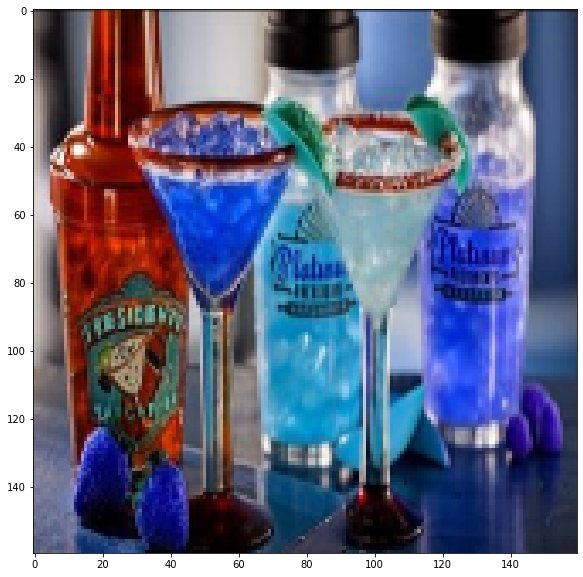

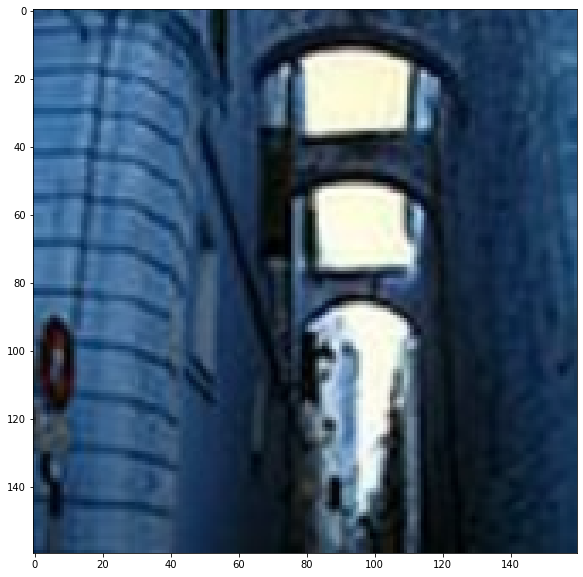

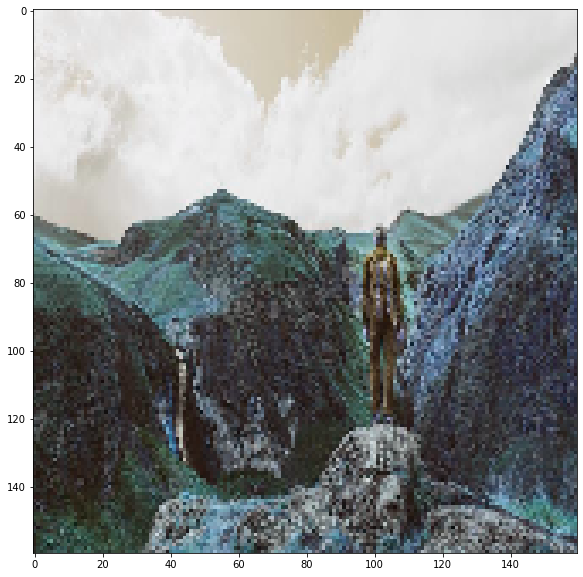

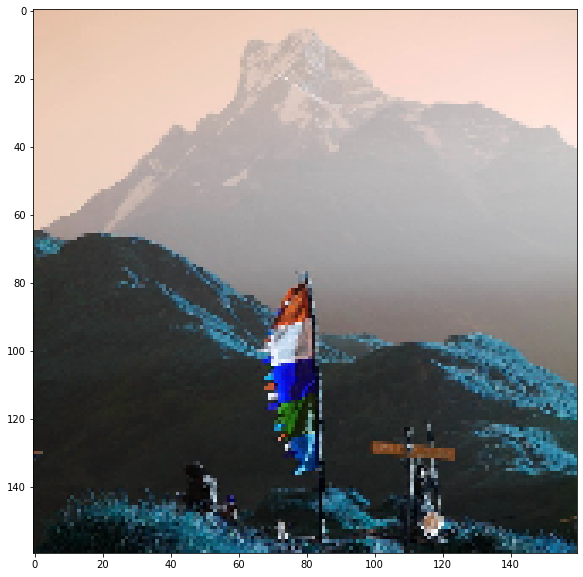

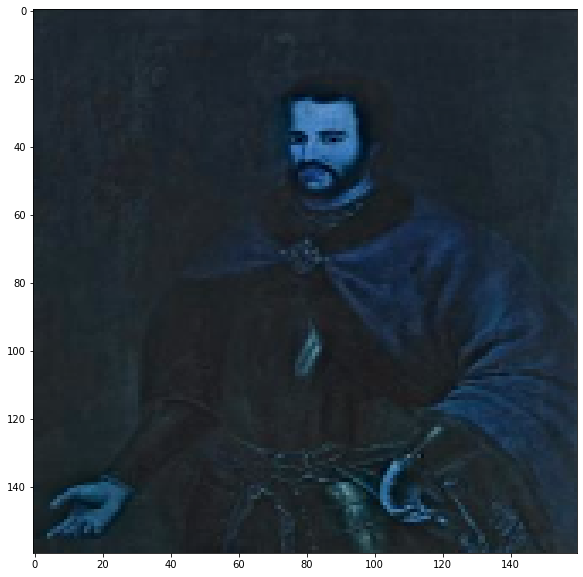

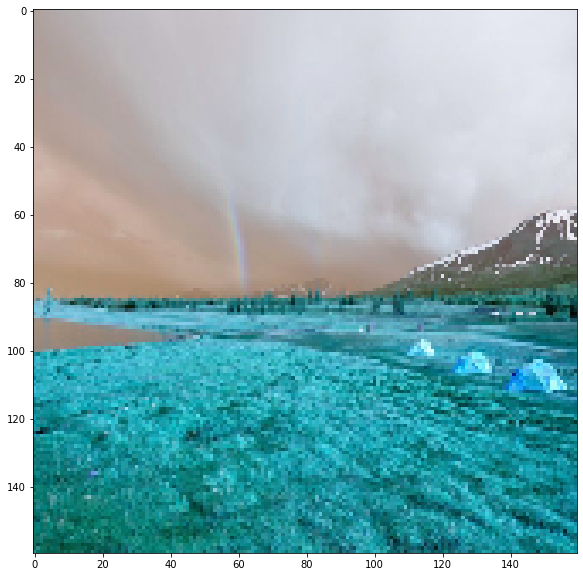

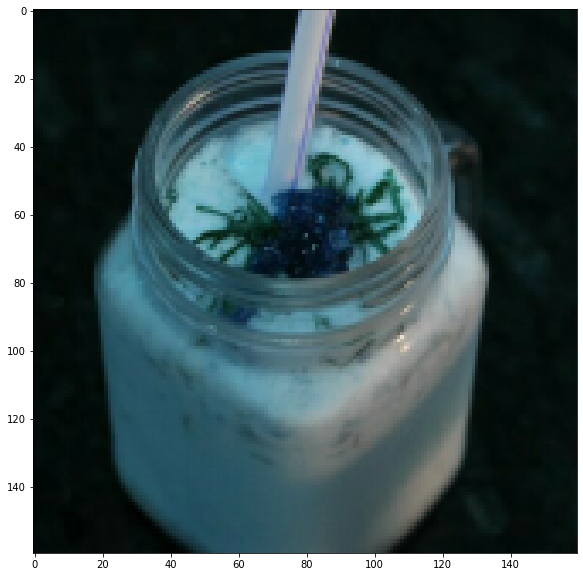

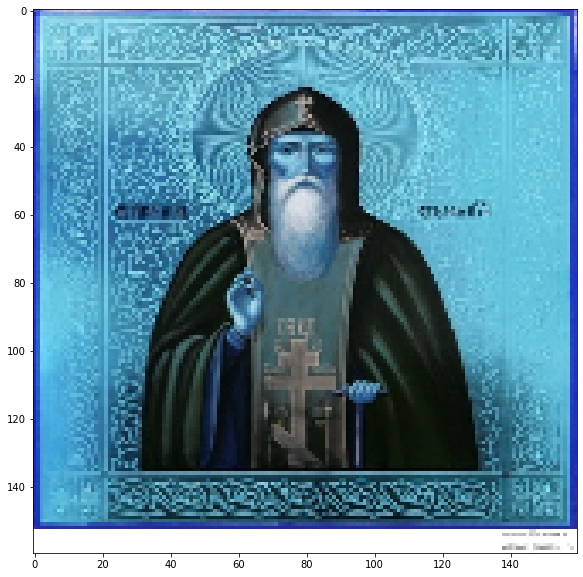

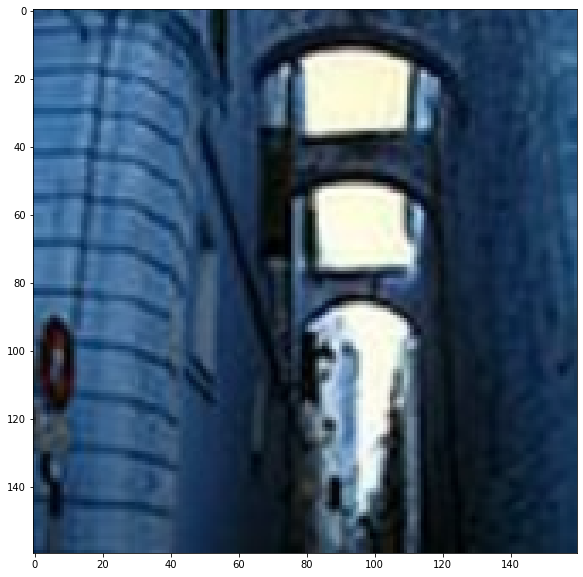

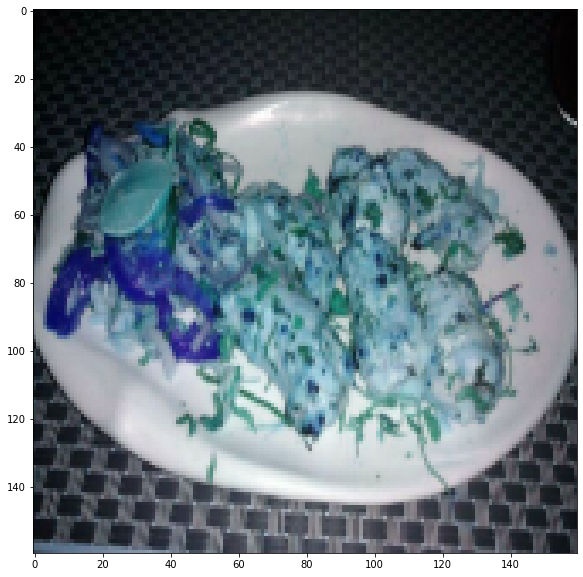

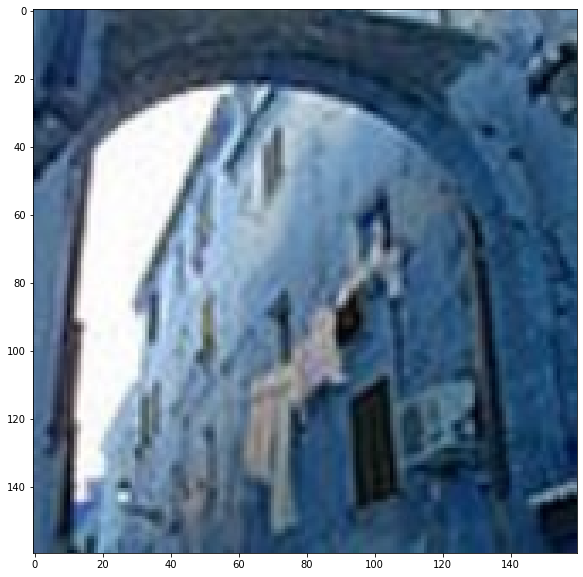

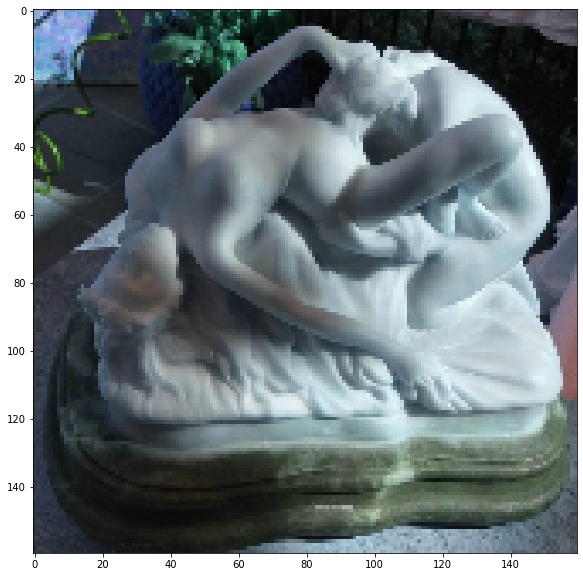

In [66]:
for img in img_in_folder:
    img=cv2.imread(img) #읽기, 스케일링
    img=cv2.resize(img, (160, 160)) #리사이징
    img_array = keras.preprocessing.image.img_to_array(img)
    img_array = tf.expand_dims(img_array, 0) # Create a batch
    predictions = model.predict(img_array)
    score = tf.nn.softmax(predictions[0])

    print(
        "This image most likely belongs to {} with a {:.2f} percent confidence."
        .format(class_names[np.argmax(predictions[0])], 100 * np.max(score))
    )
    print(predictions)


In [20]:
score

<tf.Tensor: shape=(4,), dtype=float32, numpy=array([0.23596737, 0.20926395, 0.20840953, 0.34635916], dtype=float32)>

In [ ]:
predictions = model.predict(img_array)
score = tf.nn.softmax(predictions[0])

print(
    "This image most likely belongs to {} with a {:.2f} percent confidence."
    .format(class_names[np.argmax(score)], 100 * np.max(score))
)


In [12]:
from tensorflow import keras
batch_size = 32
img_height = 160
img_width = 160
class_names = ['architecure', 'art and culture', 'food and drinks', 'travel and adventure']

sunflower_url = "https://storage.googleapis.com/download.tensorflow.org/example_images/592px-Red_sunflower.jpg"
sunflower_path = tf.keras.utils.get_file('Red_sunflower', origin=sunflower_url)

img = keras.preprocessing.image.load_img(
    sunflower_path, target_size=(img_height, img_width)
)
img_array = keras.preprocessing.image.img_to_array(img)
img_array = tf.expand_dims(img_array, 0) # Create a batch

predictions = model.predict(img_array)
score = tf.nn.softmax(predictions[0])

print(
    "This image most likely belongs to {} with a {:.2f} percent confidence."
    .format(class_names[np.argmax(score)], 100 * np.max(score))
)

1/1 [==============================] - 0s 89ms/step
This image most likely belongs to art and culture with a 46.75 percent confidence.


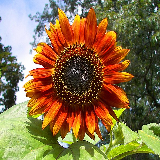

In [13]:
img

In [28]:
import tensorflow as tf

In [29]:
for img in img_in_folder:
    img

ValueError: Please specify the "origin" argument (URL of the file to download).